In [74]:
from IPython.display import Image
import xlsxwriter
import openpyxl
import pandas as pd
from matplotlib import rc
rc('font', family='Malgun Gothic')
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter
import openpyxl
import pandas as pd
from matplotlib import rc
rc('font', family='Malgun Gothic')
%matplotlib inline
%config InlineBacked.figure_format = {'png', 'retina'}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



In [2]:
donour = pd.read_excel("./datas/Donour.xlsx",'②후원내역')
rating_18_1 = pd.read_excel("./datas/Rating_18-1.xlsx",'③송출내역-18년-1')
rating_18_2 = pd.read_excel("./datas/Rating_18-2.xlsx",'③송출내역-18년-2')
rating_19 = pd.read_excel("./datas/Rating_19.xlsx",'③송출내역-19년')
rating_20 = pd.read_excel("./datas/Rating_20.xlsx",'③송출내역-20년')
donour.head(4)

,Date,Time,Daypart,Dnis,Station,I/B콜수,응대호,정기후원,후원금액,Film,연월
0,2018-01-01,09:30:00,09시대,1899-0219,Ch.view,0,0,1,20000,진우,1801월
1,2018-01-02,08:45:00,08시대,1899-0263,MBC드라마,1,1,0,0,"최선규,죽기위해태어나는아이가있을까요",1801월
2,2018-01-02,09:00:00,09시대,1899-0263,MBC드라마,0,0,1,20000,"최선규,죽기위해태어나는아이가있을까요",1801월
3,2018-01-02,09:45:00,09시대,1899-7319,SkyTravel,1,1,2,50000,",이아이의눈에서눈물을멈추게할수는없을까",1801월


In [3]:
rating = pd.concat([rating_18_1, rating_18_2, rating_19, rating_20], axis = 0).reset_index()
rating.head(1)

,index,Station,Date,Time,Secs,Film,Programme,Genre,Net Price,Cost,Audience,Salehouse,promocode,pib,pip,origin,telno,SPOT,Daypart,연월
0,0,GTV,2018-06-10,07:45:26,60,Kayembe-KRW20k,속풀이쇼동치미,Ent:Talk show,30354.131535,33389.544688,0.0,NaN,NaN,Pre,end,NaN,NaN,1,07시대,1806월


In [4]:
# 큐시트 : 광고방송스케쥴
cue_sheet = pd.read_excel("./datas/Cuesheet.xlsx",'①큐시트')
cue_sheet.head(1)

,Station,Programme,Time,Daypart,Class,Secs,Kinds,Unit price,Bonus rate,Net price,Insertion,Ad value,Cost,Date,Film,연월
0,C채널,광림의시간,12:59:00,12시대,SA,60,SPOT,1400000.0,60.4,23178.807947,1,1400000.0,25496.688742,2020-05-31,JUST 신구,2005월


In [6]:
df1 = rating[["Date","Net Price", "Audience", "SPOT","Film","Station"]]
df_features = df1.groupby("Station").sum().reset_index()
df2 = donour[["Date","I/B콜수", "응대호", "정기후원","후원금액","Film","Station"]]
df_targets = df2.groupby("Station").sum().reset_index()
datas_1 = pd.merge(df_features, df_targets, how='inner',on='Station')
datas_1.tail(4)

,Station,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
29,채널A,100000000.0,15666645.0,344,557,506,193,4095000
30,채널J,5000000.0,206315.0,150,30,25,8,170000
31,채널차이나,7000000.0,700000.0,246,43,39,12,240000
32,평화방송,40000000.0,33939.0,978,422,401,135,2766666


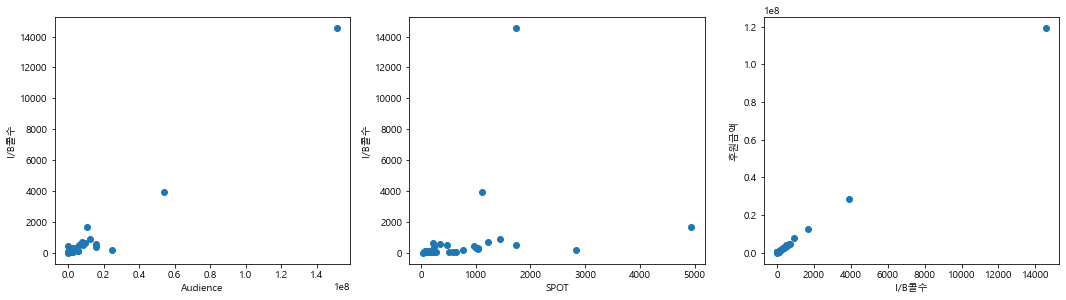

In [37]:
# Impression이 커질수록 I/B 콜이 커지는 경향성을 보임
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(2,3,1)
x1 = datas_1["Audience"]
y1 = datas_1["I/B콜수"]
plt.scatter(x1, y1)
plt.xlabel('Audience')
plt.ylabel('I/B콜수')

# SPOT의 경우 Impression 대비 I/B의 분포가 커지는 경향
ax2 = fig.add_subplot(2,3,2)
x2 = datas_1["SPOT"]
y1 = datas_1["I/B콜수"]
plt.scatter(x2, y1)
plt.xlabel('SPOT')
plt.ylabel('I/B콜수')

# 콜수가 많아지면 후원금액이 많아진다.
ax3 = fig.add_subplot(2,3,3)
x3 = datas_1["I/B콜수"]
#y2 = datas_1["정기후원"]
y3 = datas_1["후원금액"]
plt.scatter(x3, y3)
plt.xlabel('I/B콜수')
plt.ylabel('후원금액')
plt.show()

In [38]:
df1 = rating[["Date","Net Price", "Audience", "SPOT","Film","Station"]]
df_features = df1.groupby("Film").sum().reset_index()
df2 = donour[["Date","I/B콜수", "응대호", "정기후원","후원금액","Film","Station"]]
df_targets = df2.groupby("Film").sum().reset_index()
datas_2 = pd.merge(df_features, df_targets, how='inner',on='Film')
datas_2.head(1)

,Film,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
0,JUST,1.474807e+08,1.559313e+07,1984,1748,1644,604,12737000


In [47]:
# 날짜별로 특성만 가져오기
df1 = rating[["Date","Net Price", "Audience", "SPOT"]]
df_features = df1.groupby("Date").sum().reset_index()
# 날짜별로 라벨만 가져오기
df2 = donour[["Date","I/B콜수", "응대호", "정기후원", "후원금액"]]
df_targets = df2.groupby("Date").sum().reset_index()
# 분석데이터 가져오기
df_features
datas_3 = pd.merge(df_features, df_targets, how='inner',on='Date')
datas_3 = datas_3.groupby("Date").sum().reset_index()
datas_3.head(1)

,Date,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
0,2018-01-01,225988.700565,82283.0,9,0,0,1,20000


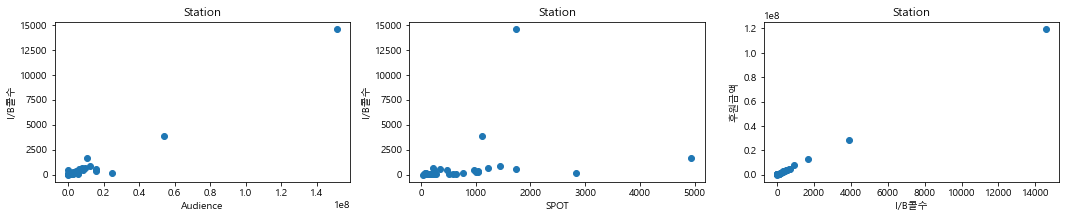

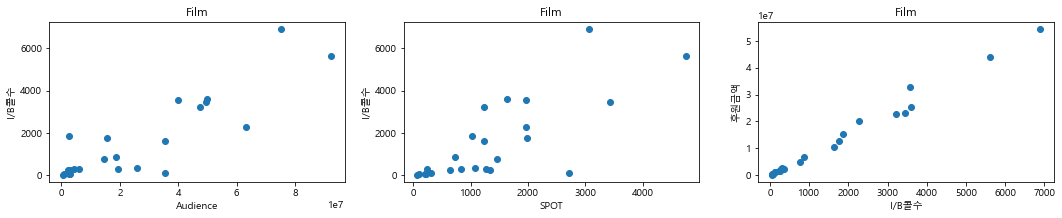

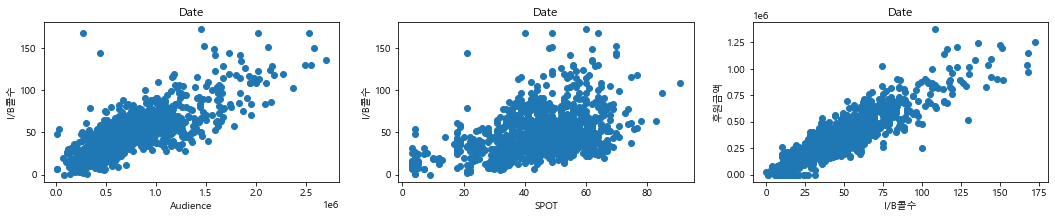

In [58]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(3,3,1)
x1 = datas_1["Audience"]
y1 = datas_1["I/B콜수"]
plt.scatter(x1, y1)
plt.xlabel('Audience')
plt.ylabel('I/B콜수')
plt.title('Station')

ax2 = fig.add_subplot(3,3,2)
x2 = datas_1["SPOT"]
y1 = datas_1["I/B콜수"]
plt.scatter(x2, y1)
plt.xlabel('SPOT')
plt.ylabel('I/B콜수')
plt.title('Station')

ax3 = fig.add_subplot(3,3,3)
x3 = datas_1["I/B콜수"]
#y2 = datas_1["정기후원"]
y3 = datas_1["후원금액"]
plt.scatter(x3, y3)
plt.xlabel('I/B콜수')
plt.ylabel('후원금액')
plt.title('Station')
# ====================================================================================================

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(3,3,4)
x1 = datas_2["Audience"]
y1 = datas_2["I/B콜수"]
plt.scatter(x1, y1)
plt.xlabel('Audience')
plt.ylabel('I/B콜수')
plt.title('Film')

ax2 = fig.add_subplot(3,3,5)
x2 = datas_2["SPOT"]
y1 = datas_2["I/B콜수"]
plt.scatter(x2, y1)
plt.xlabel('SPOT')
plt.ylabel('I/B콜수')
plt.title('Film')

ax3 = fig.add_subplot(3,3,6)
x3 = datas_2["I/B콜수"]
#y2 = datas_1["정기후원"]
y3 = datas_2["후원금액"]
plt.scatter(x3, y3)
plt.xlabel('I/B콜수')
plt.ylabel('후원금액')
plt.title('Film')


# ====================================================================================================

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(3,3,7)
x1 = datas_3["Audience"]
y1 = datas_3["I/B콜수"]
plt.scatter(x1, y1)
plt.xlabel('Audience')
plt.ylabel('I/B콜수')
plt.title('Date')

ax2 = fig.add_subplot(3,3,8)
x2 = datas_3["SPOT"]
y1 = datas_3["I/B콜수"]
plt.scatter(x2, y1)
plt.xlabel('SPOT')
plt.ylabel('I/B콜수')
plt.title('Date')

ax3 = fig.add_subplot(3,3,9)
x3 = datas_3["I/B콜수"]
#y2 = datas_1["정기후원"]
y3 = datas_3["후원금액"]
plt.scatter(x3, y3)
plt.xlabel('I/B콜수')
plt.ylabel('후원금액')
plt.title('Date')
plt.show()


### Station, Film, Date 별 Audience, SPOT과 후원금액, 정기후원, 응대호,I/B콜수의 상관관계

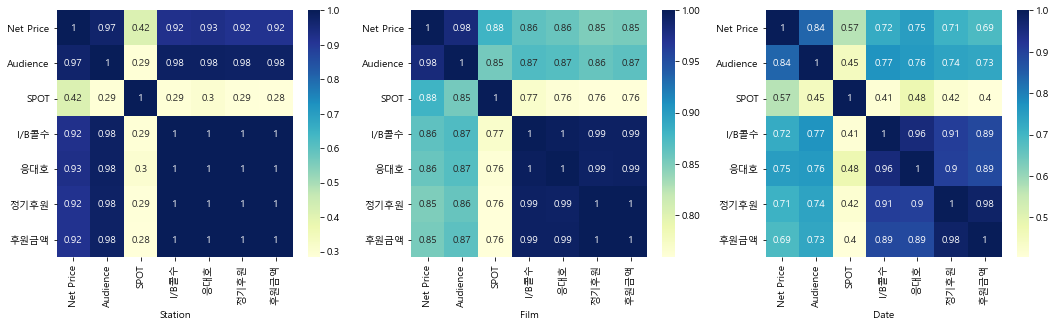

In [72]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(2,3,1)
sns.heatmap(datas_1.corr(), cmap="YlGnBu", annot=True)
plt.xlabel("Station")

ax2 = fig.add_subplot(2,3,2)
sns.heatmap(datas_2.corr(), cmap="YlGnBu", annot=True)
plt.xlabel("Film")

ax3 = fig.add_subplot(2,3,3)
sns.heatmap(datas_3.corr(), cmap="YlGnBu", annot=True)
plt.xlabel("Date")
plt.show()

In [101]:
datas_1.sort_values(by=['후원금액'], axis=0, ascending=False).head(10)

,Station,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
8,EBS,6.851879e+08,1.512981e+08,1732,14560,11795,5437,119372000
24,YTN,3.600000e+08,5.416008e+07,1113,3904,3497,1288,28620000
5,C채널,1.073928e+08,1.071873e+07,4937,1671,1554,603,12490000
4,CTS,1.217952e+08,1.217952e+07,1444,905,866,348,7747000
3,CNTV,7.801370e+07,7.751111e+06,1229,694,672,226,4785000
23,TV조선,5.960856e+07,9.739410e+06,229,628,586,217,4420000
29,채널A,1.000000e+08,1.566664e+07,344,557,506,193,4095000
15,MBC드라마,7.000000e+07,8.235863e+06,485,500,448,185,3905000
17,MBN Plus,7.433333e+07,6.048912e+06,1744,526,451,171,3760000
32,평화방송,4.000000e+07,3.393900e+04,978,422,401,135,2766666


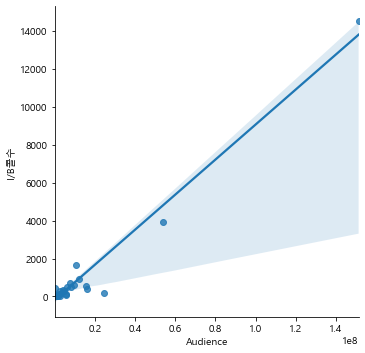

In [103]:
sns.lmplot(x='Audience', y='I/B콜수', data=datas_1)

In [97]:
datas_1.sort_values(by=['SPOT'], axis=0, ascending=False).head(10)

,Station,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
5,C채널,1.073928e+08,1.071873e+07,4937,1671,1554,603,12490000
2,CBS,2.475190e+08,2.460599e+07,2834,200,184,68,1475000
17,MBN Plus,7.433333e+07,6.048912e+06,1744,526,451,171,3760000
8,EBS,6.851879e+08,1.512981e+08,1732,14560,11795,5437,119372000
4,CTS,1.217952e+08,1.217952e+07,1444,905,866,348,7747000
3,CNTV,7.801370e+07,7.751111e+06,1229,694,672,226,4785000
24,YTN,3.600000e+08,5.416008e+07,1113,3904,3497,1288,28620000
11,GTV,3.089286e+07,4.354287e+06,1042,330,302,106,2685000
27,드라마H,4.500000e+07,4.500000e+06,1039,264,250,85,1785000
12,JTBC4,5.000000e+07,2.792379e+06,1003,306,251,102,2485000


In [98]:
datas_1.sort_values(by=['Net Price'], axis=0, ascending=False).head(10)

,Station,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
8,EBS,6.851879e+08,1.512981e+08,1732,14560,11795,5437,119372000
24,YTN,3.600000e+08,5.416008e+07,1113,3904,3497,1288,28620000
2,CBS,2.475190e+08,2.460599e+07,2834,200,184,68,1475000
4,CTS,1.217952e+08,1.217952e+07,1444,905,866,348,7747000
5,C채널,1.073928e+08,1.071873e+07,4937,1671,1554,603,12490000
29,채널A,1.000000e+08,1.566664e+07,344,557,506,193,4095000
20,SBS,9.968000e+07,1.593219e+07,241,388,355,118,2655000
3,CNTV,7.801370e+07,7.751111e+06,1229,694,672,226,4785000
17,MBN Plus,7.433333e+07,6.048912e+06,1744,526,451,171,3760000
15,MBC드라마,7.000000e+07,8.235863e+06,485,500,448,185,3905000


In [99]:
datas_1.sort_values(by=['Audience'], axis=0, ascending=False).head(10)

,Station,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
8,EBS,6.851879e+08,1.512981e+08,1732,14560,11795,5437,119372000
24,YTN,3.600000e+08,5.416008e+07,1113,3904,3497,1288,28620000
2,CBS,2.475190e+08,2.460599e+07,2834,200,184,68,1475000
20,SBS,9.968000e+07,1.593219e+07,241,388,355,118,2655000
29,채널A,1.000000e+08,1.566664e+07,344,557,506,193,4095000
4,CTS,1.217952e+08,1.217952e+07,1444,905,866,348,7747000
5,C채널,1.073928e+08,1.071873e+07,4937,1671,1554,603,12490000
23,TV조선,5.960856e+07,9.739410e+06,229,628,586,217,4420000
15,MBC드라마,7.000000e+07,8.235863e+06,485,500,448,185,3905000
3,CNTV,7.801370e+07,7.751111e+06,1229,694,672,226,4785000


In [100]:
datas_1.sort_values(by=['I/B콜수'], axis=0, ascending=False).head(10)

,Station,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
8,EBS,6.851879e+08,1.512981e+08,1732,14560,11795,5437,119372000
24,YTN,3.600000e+08,5.416008e+07,1113,3904,3497,1288,28620000
5,C채널,1.073928e+08,1.071873e+07,4937,1671,1554,603,12490000
4,CTS,1.217952e+08,1.217952e+07,1444,905,866,348,7747000
3,CNTV,7.801370e+07,7.751111e+06,1229,694,672,226,4785000
23,TV조선,5.960856e+07,9.739410e+06,229,628,586,217,4420000
29,채널A,1.000000e+08,1.566664e+07,344,557,506,193,4095000
17,MBN Plus,7.433333e+07,6.048912e+06,1744,526,451,171,3760000
15,MBC드라마,7.000000e+07,8.235863e+06,485,500,448,185,3905000
32,평화방송,4.000000e+07,3.393900e+04,978,422,401,135,2766666
